### 1 - Packages ###
Let's first import all the packages that you will need during this assignment.

numpy is the fundamental package for scientific computing with Python.
sklearn provides simple and efficient tools for data mining and data analysis.
matplotlib is a library for plotting graphs in Python.
testCases provides some test examples to assess the correctness of your functions
planar_utils provide various useful functions used in this assignment

In [1]:
import sys  
sys.path.insert(1, '../')

import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
from utils import nn_model, he_initialize_parameters, input_output_layer_sizes, tanh, sigmoid, predict, metrics

%matplotlib inline
np.random.seed(42)

### 2 - Load dataset ###

In [2]:
X, y = load_planar_dataset()

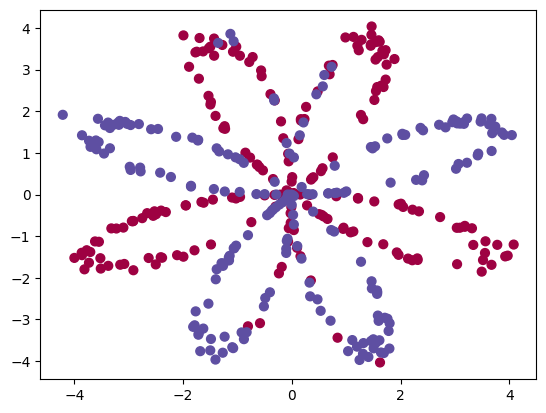

In [3]:
# Visualize dataset
plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral, s=40)

### Test with simple logistic regression

In [4]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, y.T)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV()

#### Plot decision boundary for logistic regression

Text(0.5, 1.0, 'Logistic Regression')

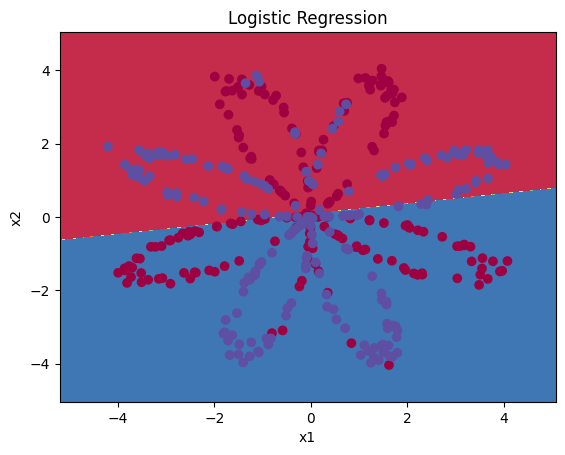

In [5]:
plot_decision_boundary(lambda x: clf.predict(x), X, y)
plt.title("Logistic Regression")

#### Calculate model accuracy

In [6]:
LR_predictions = clf.predict(X.T)

print ('Accuracy of logistic regression: %d ' % float((np.dot(y,LR_predictions) + np.dot(1-y,1-LR_predictions))/float(y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


<b>Conclusion: </b> The dataset is not linearly separable, so logistic regression doesn't perform well. 

### Train a one-layer Neural Network

<img src="https://raw.githubusercontent.com/amanchadha/coursera-deep-learning-specialization/08f1947ca9341d69fe013d1462813c4c07a1b169/C1%20-%20Neural%20Networks%20and%20Deep%20Learning/Week%203/Planar%20data%20classification%20with%20one%20hidden%20layer/images/classification_kiank.png"/>

**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

In [7]:
n_h = 20
n_x, n_y = input_output_layer_sizes(X, y)
layer_sizes = [n_x, n_h, n_y]
activations = [tanh, sigmoid]
parameters = he_initialize_parameters(layer_sizes)

parameters, costs = nn_model(X, y, layer_sizes=layer_sizes, parameters= parameters, activations=activations, print_cost=True, number_of_iterations=100000, learning_rate=0.085)
parameters

Cost after iteration 0: 0.661883
Cost after iteration 100: 0.461262
Cost after iteration 200: 0.400542
Cost after iteration 300: 0.371172
Cost after iteration 400: 0.353580
Cost after iteration 500: 0.341290
Cost after iteration 600: 0.331788
Cost after iteration 700: 0.323960
Cost after iteration 800: 0.317256
Cost after iteration 900: 0.311378
Cost after iteration 1000: 0.306146
Cost after iteration 1100: 0.301444
Cost after iteration 1200: 0.297191
Cost after iteration 1300: 0.293323
Cost after iteration 1400: 0.289794
Cost after iteration 1500: 0.286560
Cost after iteration 1600: 0.283587
Cost after iteration 1700: 0.280844
Cost after iteration 1800: 0.278305
Cost after iteration 1900: 0.275945
Cost after iteration 2000: 0.273743
Cost after iteration 2100: 0.271681
Cost after iteration 2200: 0.269743
Cost after iteration 2300: 0.267914
Cost after iteration 2400: 0.266181
Cost after iteration 2500: 0.264535
Cost after iteration 2600: 0.262966
Cost after iteration 2700: 0.261466
Cost

{'W1': array([[ 7.05580306, -2.16129573],
        [ 0.03488871, -5.85803128],
        [ 0.28645398, -8.77417407],
        [ 4.70644445, -5.68372735],
        [ 2.13378043, -1.24353958],
        [ 5.5410114 , -6.39827361],
        [-1.70522089, -0.6150411 ],
        [ 5.80744194, -6.62330984],
        [ 0.08732856, -2.24619973],
        [-0.97125024,  1.87668311],
        [-3.41807959,  2.77744215],
        [ 4.18304249,  4.50947386],
        [ 1.42450989, -0.81292287],
        [-0.03836042, -4.74922211],
        [-2.79985156,  0.10099498],
        [-3.0708548 , -3.47653793],
        [-7.42061635, -7.64642666],
        [-1.23671773, -1.14027344],
        [-2.76155501,  0.73822826],
        [ 6.00351117,  2.7234566 ]]),
 'b1': array([[ 0.20903753],
        [-0.08276539],
        [-0.07098101],
        [ 0.11454358],
        [ 1.20089796],
        [ 0.17238909],
        [ 0.14820075],
        [ 0.18842107],
        [-0.44324127],
        [-0.64411732],
        [ 1.44446058],
        [ 0.0

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 20')

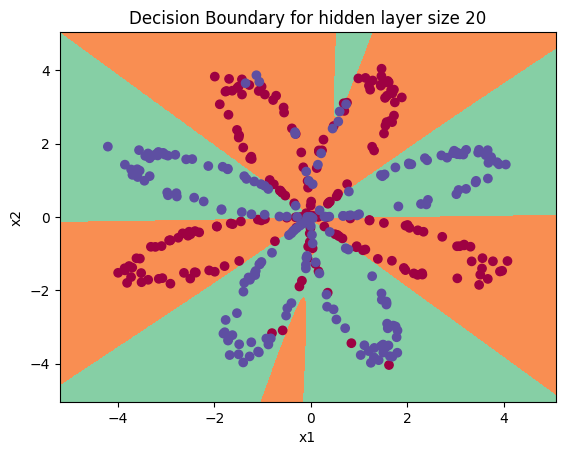

In [8]:
plot_decision_boundary(lambda x: predict(parameters, activations, x.T), X, y)
plt.title("Decision Boundary for hidden layer size " + str(n_h))

In [9]:
#Print accuracy, precision
predictions = predict(parameters, activations, X)
metrics(y, predictions, n_h)

TypeError: metrics() takes 2 positional arguments but 3 were given

Precision for n_h=1: 67.5 %
Recall for n_h=1: 67.5 %
Accuracy for n_h=1: 67.5 %
Precision for n_h=2: 66.83673469387756 %
Recall for n_h=2: 65.5 %
Accuracy for n_h=2: 66.5 %
Precision for n_h=3: 72.08121827411168 %
Recall for n_h=3: 71.0 %
Accuracy for n_h=3: 71.75 %
Precision for n_h=4: 91.04477611940298 %
Recall for n_h=4: 91.5 %
Accuracy for n_h=4: 91.25 %
Precision for n_h=5: 91.54228855721394 %
Recall for n_h=5: 92.0 %
Accuracy for n_h=5: 91.75 %
Precision for n_h=10: 93.33333333333333 %
Recall for n_h=10: 91.0 %
Accuracy for n_h=10: 92.25 %
Precision for n_h=20: 91.82692307692307 %
Recall for n_h=20: 95.5 %
Accuracy for n_h=20: 93.5 %


/Users/sstonn/Desktop/ml_fundamentals/planar_classified_neural_network/../utils.py:106: RuntimeWarning: divide by zero encountered in log
  cost = (1./m) * (-np.dot(Y, np.log(A_last).T) - np.dot(1-Y, np.log(1-A_last).T))


Precision for n_h=50: 93.62745098039215 %
Recall for n_h=50: 95.5 %
Accuracy for n_h=50: 94.5 %


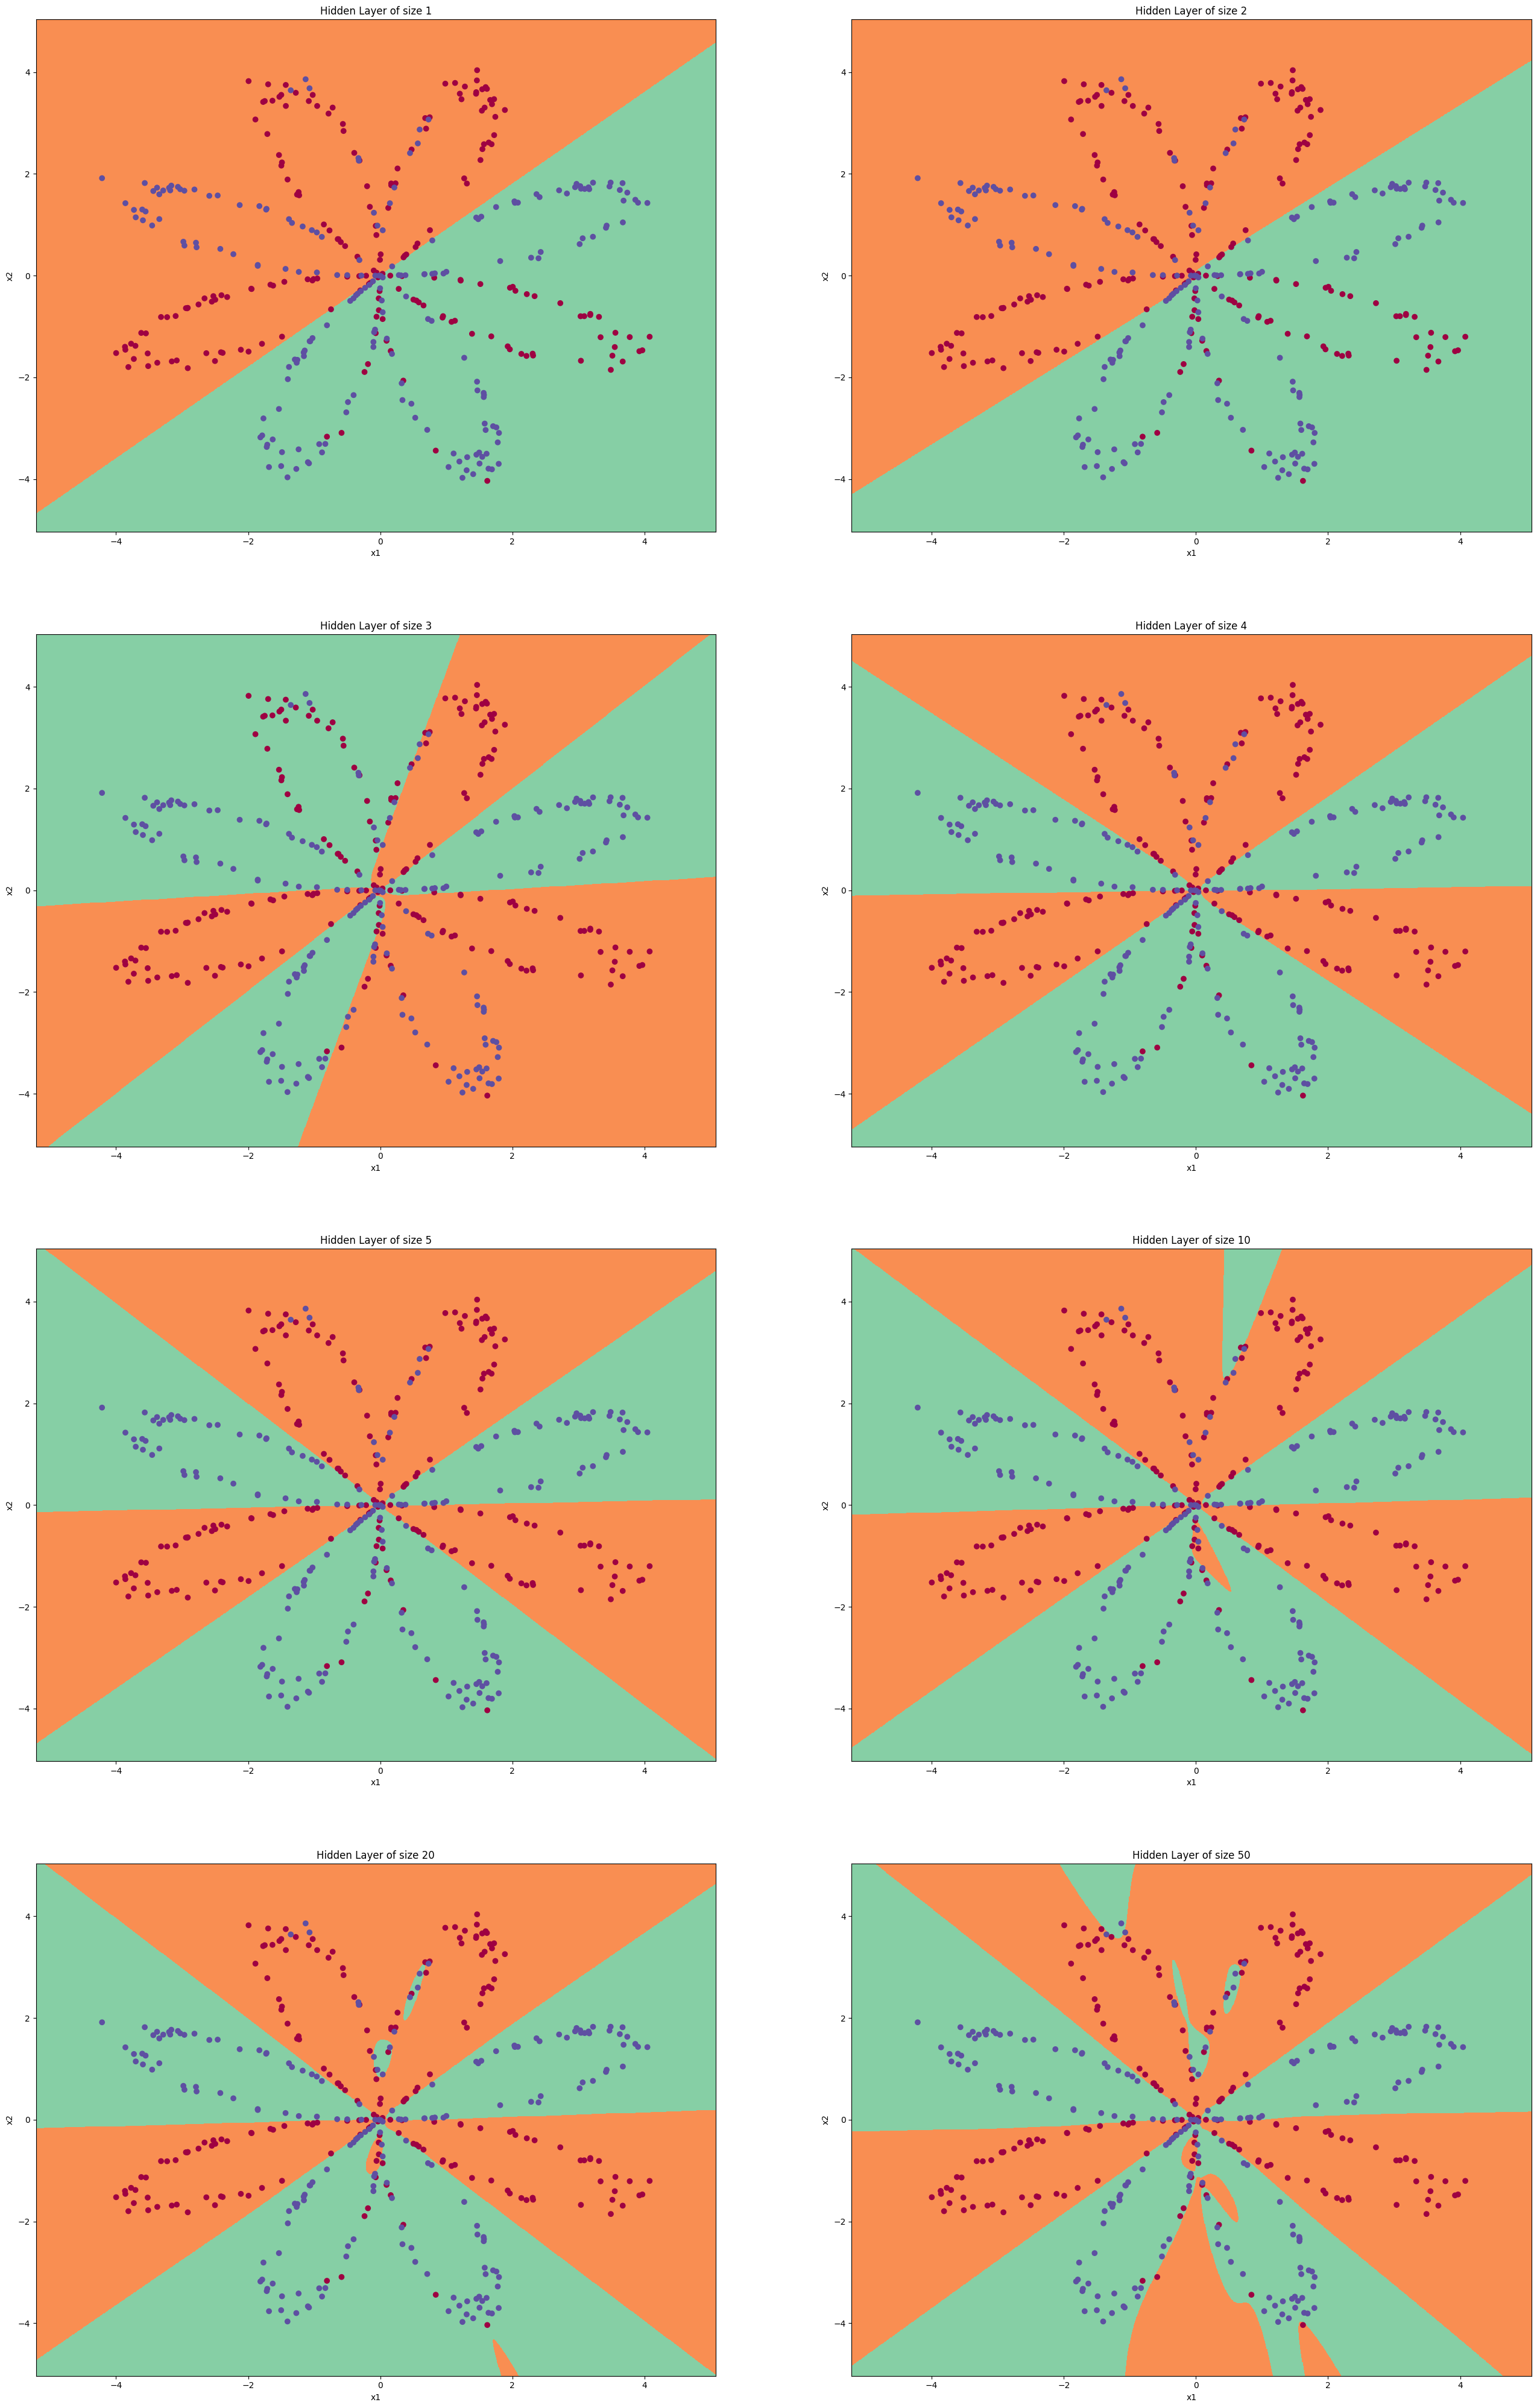

In [ ]:
plt.figure(figsize=(32, 64))
hidden_layer_sizes = [1, 2, 3, 4, 5, 10, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i + 1)
    plt.title('Hidden Layer of size %d' % n_h)
    n_x, n_y = input_output_layer_sizes(X, y)
    layer_sizes = [n_x, n_h, n_y]
    parameters = he_initialize_parameters(layer_sizes)
    parameters, _ = nn_model(X, y, layer_sizes=layer_sizes, parameters=parameters, activations=activations, number_of_iterations=50000, learning_rate=0.085)
    plot_decision_boundary(lambda x: predict(parameters, activations, x.T), X, y)
    predictions = predict(parameters, activations, X)
    metrics(y, predictions, n_h)

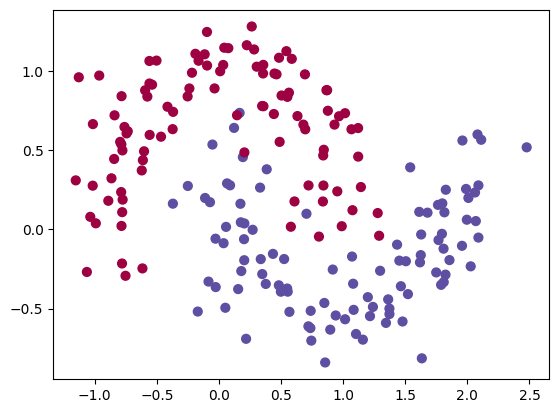

In [ ]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

dataset = "noisy_moons"

X, y = datasets[dataset]

# make blobs binary
if dataset == "blobs":
    y = y%2

# Visualize the data
plt.scatter(X.T[0, :], X.T[1, :], c=y, s=40, cmap=plt.cm.Spectral);

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.6)

X_train, X_test, y_train, y_test = X_train.T, X_test.T, y_train.reshape(1, y_train.shape[0]), y_test.reshape(1, y_test.shape[0])

In [ ]:
n_h = 10
n_x, n_y = input_output_layer_sizes(X_train, y_train)
layer_sizes = [n_x, n_h, n_y]
activations = [tanh, sigmoid]
parameters = he_initialize_parameters(layer_sizes)

parameters, costs = nn_model(X_train, y_train, layer_sizes=layer_sizes, parameters=parameters, activations=activations, number_of_iterations=100000, print_cost=True, learning_rate=0.085)
parameters

Cost after iteration 0: 0.772764
Cost after iteration 100: 0.341647
Cost after iteration 200: 0.326153
Cost after iteration 300: 0.320963
Cost after iteration 400: 0.318085
Cost after iteration 500: 0.315694
Cost after iteration 600: 0.313264
Cost after iteration 700: 0.310544
Cost after iteration 800: 0.307317
Cost after iteration 900: 0.303339
Cost after iteration 1000: 0.298331
Cost after iteration 1100: 0.291995
Cost after iteration 1200: 0.284068
Cost after iteration 1300: 0.274417
Cost after iteration 1400: 0.263137
Cost after iteration 1500: 0.250581
Cost after iteration 1600: 0.237290
Cost after iteration 1700: 0.223856
Cost after iteration 1800: 0.210791
Cost after iteration 1900: 0.198468
Cost after iteration 2000: 0.187104
Cost after iteration 2100: 0.176788
Cost after iteration 2200: 0.167518
Cost after iteration 2300: 0.159238
Cost after iteration 2400: 0.151866
Cost after iteration 2500: 0.145309
Cost after iteration 2600: 0.139477
Cost after iteration 2700: 0.134284
Cost

{'W1': array([[ 6.99812944,  1.97606341],
        [-6.44641184, -9.51681612],
        [ 5.42289791,  0.9558785 ],
        [ 5.36368129, -2.19941031],
        [ 0.50964506,  3.61262793],
        [ 1.75146992, -6.6292166 ],
        [-0.21669902, -0.66113195],
        [ 1.3977604 , -1.27251535],
        [ 1.53592889, -1.77025011],
        [-0.45651876, -0.22876428]]),
 'b1': array([[-2.92501562],
        [ 7.21922243],
        [-7.34129273],
        [ 3.0389595 ],
        [-0.68108671],
        [-2.93336542],
        [ 0.12030966],
        [ 0.9595039 ],
        [ 1.12879489],
        [-0.28955108]]),
 'W2': array([[-6.10712317,  8.0715462 ,  9.70011078,  7.26002955,  3.84778059,
          5.41923366, -1.16985409,  2.3370267 ,  2.44278204, -1.24687452]]),
 'b2': array([[0.27384585]]),
 'learning_rate': 0.085,
 'number_of_iterations': 100000,
 'activations': [<function utils.tanh(Z)>, <function utils.sigmoid(Z)>],
 'layer_sizes': [2, 10, 1]}

Text(0.5, 1.0, 'Training Decision Boundary for hidden layer size 10')

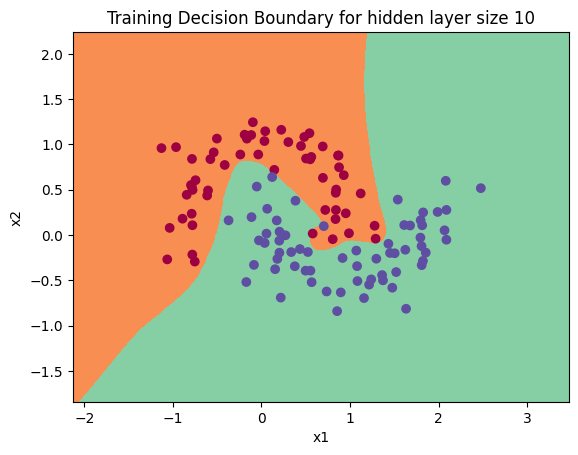

In [ ]:
plot_decision_boundary(lambda x: predict(parameters, activations, x.T), X_train, y_train)
plt.title("Training Decision Boundary for hidden layer size " + str(n_h))

Text(0.5, 1.0, 'Testing Decision Boundary for hidden layer size 10')

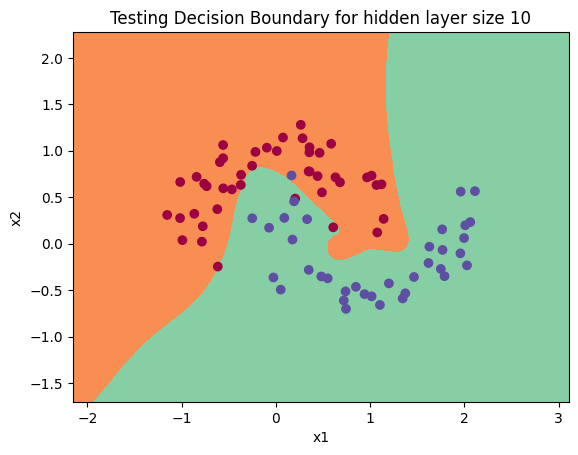

In [ ]:
plot_decision_boundary(lambda x: predict(parameters,activations, x.T), X_test, y_test)
plt.title("Testing Decision Boundary for hidden layer size " + str(n_h))

In [ ]:
# Print accuracy
training_predictions = predict(parameters, activations, X_train)
metrics(y_train, training_predictions, n_h)

Precision for n_h=10: 100.0 %
Recall for n_h=10: 98.4375 %
Accuracy for n_h=10: 99.16666666666667 %


In [ ]:
# Print accuracy
test_predictions = predict(parameters, activations, X_test)
metrics(y_test, test_predictions, n_h)

Precision for n_h=10: 94.5945945945946 %
Recall for n_h=10: 97.22222222222221 %
Accuracy for n_h=10: 96.25 %
